ETL Basico com Python
Fonte de dados: dados abertos de contratos administrativos da AEB - Agencia Espacial Brasileira

https://dados.gov.br/dataset/dados-abertos-de-contratos-administrativos/resource/6a9526c4-bd86-46fb-b7aa-539df37f849a


ETL de arquivo JSON: o objetivo desse processo sera transformar os arquivos em formato JSON para dataframe e carrega-los ao banco de dados BigQuery

In [4]:
import pandas as pd
import os
from IPython.display import Image
import json
from google.oauth2 import service_account #biblioteca que importa dataframe para o banco de dados do bigquery

In [5]:
os.chdir("/Users/laura.nonato/Downloads/cursos/ETL com python")

Etapa de extração

In [6]:
#abre o arquivo json 
f = open('tb_acoes.json', encoding='utf-8')

#guardar os dados do arquivo json em uma nova variavel
data = json.load(f)

In [7]:
data

[{'id_acao': 1,
  'nome_acao': 'Assistência Pré-escolar aos Dependentes dos Servidores e Empregados'},
 {'id_acao': 2,
  'nome_acao': 'Assistência Médica e Odontológica aos Servidores, Empregados e seus Dependentes'},
 {'id_acao': 3, 'nome_acao': 'Auxílio Transporte aos Servidores e Empregados'},
 {'id_acao': 4,
  'nome_acao': 'Auxílio Alimentação aos Servidores e Empregados'},
 {'id_acao': 5, 'nome_acao': 'Desenvolvimento de Satélites'},
 {'id_acao': 6,
  'nome_acao': 'Desenvolvimento de Veículos Lançadores de Satélites'},
 {'id_acao': 7, 'nome_acao': 'Desenvolvimento de Foguetes de Sondagem'},
 {'id_acao': 8,
  'nome_acao': 'Pesquisa e Desenvolvimento em Ciências e Tecnologias Espaciais'},
 {'id_acao': 9,
  'nome_acao': 'Capacitação de Recursos Humanos para a Área Espacial'},
 {'id_acao': 10,
  'nome_acao': 'Regulamentações, Licenças e Certificações Espaciais'},
 {'id_acao': 11,
  'nome_acao': 'Manutenção e Atualização da Infra-estrutura Espacial'},
 {'id_acao': 12, 'nome_acao': 'Man

In [8]:
#transformacao do arquivo json em uma tabela (Dataframe)

acoes = pd.read_json('tb_acoes.json')

In [9]:
acoes.head(10)

,id_acao,nome_acao
0,1,Assistência Pré-escolar aos Dependentes dos Se...
1,2,Assistência Médica e Odontológica aos Servidor...
2,3,Auxílio Transporte aos Servidores e Empregados
3,4,Auxílio Alimentação aos Servidores e Empregados
4,5,Desenvolvimento de Satélites
5,6,Desenvolvimento de Veículos Lançadores de Saté...
6,7,Desenvolvimento de Foguetes de Sondagem
7,8,Pesquisa e Desenvolvimento em Ciências e Tecno...
8,9,Capacitação de Recursos Humanos para a Área Es...
9,10,"Regulamentações, Licenças e Certificações Espa..."


In [10]:
anos = pd.read_json('tb_anos.json')
anos.head()

,id_ano,data_ano
0,1,2000
1,2,2001
2,3,2002
3,4,2003
4,5,2004


In [11]:
orcamentos = pd.read_json('tb_orcamentos.json')
orcamentos.head()

,id_orcamento,dotacao_atual,empenhado,liquidado,pago,fk_acao,fk_programa,fk_unidade,fk_ano
0,1,12000,8351,8351,8351,1,1,1,1
1,2,42750,39577,39577,39577,2,2,1,1
2,3,26000,25461,25461,25461,3,2,1,1
3,4,76755,68730,68730,68730,4,2,1,1
4,5,5882850,5191526,5191526,3611488,5,3,1,1


In [12]:
programas = pd.read_json('tb_programas.json')
programas

,id_programa,nome_programa
0,1,Atenção À Criança
1,2,Assistência ao Trabalhador
2,3,Nacional de Atividades Espaciais - Pnae
3,4,Apoio Administrativo
4,5,Gestão da Política de Comunicação de Governo
5,6,PREVIDÊNCIA DE INATIVOS E PENSIONISTAS DA UNIÃO
6,7,PROGRAMA DE APOIO ADMINISTRATIVO
7,8,Gestão da Participação em Organismos Internaci...
8,9,Valorização do Servidor Público
9,10,Política Espacial


In [13]:
unidades_orcamentarias = pd.read_json('tb_unidades_orcamentarias.json')
unidades_orcamentarias.head()

,id_unidade,nome_unidade
0,1,Agência Espacial Brasileira
1,2,"Ministério da Ciência, Tecnologia, Inovações e..."


Etapa de transformacao: a tabela base para os relacionamentos sera a de orcamentos

In [14]:
orcamentos = orcamentos.merge(acoes
                              ,left_on='fk_acao'
                              ,right_on='id_acao'
                              ,how='left')
orcamentos

,id_orcamento,dotacao_atual,empenhado,liquidado,pago,fk_acao,fk_programa,fk_unidade,fk_ano,id_acao,nome_acao
0,1,12000,8351,8351,8351,1,1,1,1,1,Assistência Pré-escolar aos Dependentes dos Se...
1,2,42750,39577,39577,39577,2,2,1,1,2,Assistência Médica e Odontológica aos Servidor...
2,3,26000,25461,25461,25461,3,2,1,1,3,Auxílio Transporte aos Servidores e Empregados
3,4,76755,68730,68730,68730,4,2,1,1,4,Auxílio Alimentação aos Servidores e Empregados
4,5,5882850,5191526,5191526,3611488,5,3,1,1,5,Desenvolvimento de Satélites
...,...,...,...,...,...,...,...,...,...,...,...
433,434,13258347,12278065,12278065,11399480,116,13,2,20,116,Ativos Civis da União
434,435,692536,630267,630267,576693,115,13,2,20,115,"Benefícios Obrigatórios aos Servidores Civis, ..."
435,436,155325,17572,17572,14572,110,13,2,20,110,Ajuda de Custo para Moradia ou Auxílio-Moradia...
436,437,16349971,15457530,7797382,7779236,27,13,2,20,27,Administração da Unidade


In [15]:
#excluo o id da açao que so  foi necessario no momento do relacionamento entre tabelas de acao e orcamento
orcamentos.drop(columns=['fk_acao','id_acao'],inplace=True)
orcamentos

,id_orcamento,dotacao_atual,empenhado,liquidado,pago,fk_programa,fk_unidade,fk_ano,nome_acao
0,1,12000,8351,8351,8351,1,1,1,Assistência Pré-escolar aos Dependentes dos Se...
1,2,42750,39577,39577,39577,2,1,1,Assistência Médica e Odontológica aos Servidor...
2,3,26000,25461,25461,25461,2,1,1,Auxílio Transporte aos Servidores e Empregados
3,4,76755,68730,68730,68730,2,1,1,Auxílio Alimentação aos Servidores e Empregados
4,5,5882850,5191526,5191526,3611488,3,1,1,Desenvolvimento de Satélites
...,...,...,...,...,...,...,...,...,...
433,434,13258347,12278065,12278065,11399480,13,2,20,Ativos Civis da União
434,435,692536,630267,630267,576693,13,2,20,"Benefícios Obrigatórios aos Servidores Civis, ..."
435,436,155325,17572,17572,14572,13,2,20,Ajuda de Custo para Moradia ou Auxílio-Moradia...
436,437,16349971,15457530,7797382,7779236,13,2,20,Administração da Unidade


In [16]:
orcamentos = orcamentos.merge(programas
                              ,left_on='fk_programa'
                              ,right_on='id_programa'
                              ,how='left')
orcamentos

,id_orcamento,dotacao_atual,empenhado,liquidado,pago,fk_programa,fk_unidade,fk_ano,nome_acao,id_programa,nome_programa
0,1,12000,8351,8351,8351,1,1,1,Assistência Pré-escolar aos Dependentes dos Se...,1,Atenção À Criança
1,2,42750,39577,39577,39577,2,1,1,Assistência Médica e Odontológica aos Servidor...,2,Assistência ao Trabalhador
2,3,26000,25461,25461,25461,2,1,1,Auxílio Transporte aos Servidores e Empregados,2,Assistência ao Trabalhador
3,4,76755,68730,68730,68730,2,1,1,Auxílio Alimentação aos Servidores e Empregados,2,Assistência ao Trabalhador
4,5,5882850,5191526,5191526,3611488,3,1,1,Desenvolvimento de Satélites,3,Nacional de Atividades Espaciais - Pnae
...,...,...,...,...,...,...,...,...,...,...,...
433,434,13258347,12278065,12278065,11399480,13,2,20,Ativos Civis da União,13,Programa de Gestão e Manutenção do Ministério ...
434,435,692536,630267,630267,576693,13,2,20,"Benefícios Obrigatórios aos Servidores Civis, ...",13,Programa de Gestão e Manutenção do Ministério ...
435,436,155325,17572,17572,14572,13,2,20,Ajuda de Custo para Moradia ou Auxílio-Moradia...,13,Programa de Gestão e Manutenção do Ministério ...
436,437,16349971,15457530,7797382,7779236,13,2,20,Administração da Unidade,13,Programa de Gestão e Manutenção do Ministério ...


In [17]:
orcamentos.drop(columns=['fk_programa','id_programa'],inplace=True)
orcamentos

,id_orcamento,dotacao_atual,empenhado,liquidado,pago,fk_unidade,fk_ano,nome_acao,nome_programa
0,1,12000,8351,8351,8351,1,1,Assistência Pré-escolar aos Dependentes dos Se...,Atenção À Criança
1,2,42750,39577,39577,39577,1,1,Assistência Médica e Odontológica aos Servidor...,Assistência ao Trabalhador
2,3,26000,25461,25461,25461,1,1,Auxílio Transporte aos Servidores e Empregados,Assistência ao Trabalhador
3,4,76755,68730,68730,68730,1,1,Auxílio Alimentação aos Servidores e Empregados,Assistência ao Trabalhador
4,5,5882850,5191526,5191526,3611488,1,1,Desenvolvimento de Satélites,Nacional de Atividades Espaciais - Pnae
...,...,...,...,...,...,...,...,...,...
433,434,13258347,12278065,12278065,11399480,2,20,Ativos Civis da União,Programa de Gestão e Manutenção do Ministério ...
434,435,692536,630267,630267,576693,2,20,"Benefícios Obrigatórios aos Servidores Civis, ...",Programa de Gestão e Manutenção do Ministério ...
435,436,155325,17572,17572,14572,2,20,Ajuda de Custo para Moradia ou Auxílio-Moradia...,Programa de Gestão e Manutenção do Ministério ...
436,437,16349971,15457530,7797382,7779236,2,20,Administração da Unidade,Programa de Gestão e Manutenção do Ministério ...


In [18]:
orcamentos = orcamentos.merge(unidades_orcamentarias
                              ,left_on='fk_unidade'
                              ,right_on='id_unidade'
                              ,how='left')
orcamentos

,id_orcamento,dotacao_atual,empenhado,liquidado,pago,fk_unidade,fk_ano,nome_acao,nome_programa,id_unidade,nome_unidade
0,1,12000,8351,8351,8351,1,1,Assistência Pré-escolar aos Dependentes dos Se...,Atenção À Criança,1,Agência Espacial Brasileira
1,2,42750,39577,39577,39577,1,1,Assistência Médica e Odontológica aos Servidor...,Assistência ao Trabalhador,1,Agência Espacial Brasileira
2,3,26000,25461,25461,25461,1,1,Auxílio Transporte aos Servidores e Empregados,Assistência ao Trabalhador,1,Agência Espacial Brasileira
3,4,76755,68730,68730,68730,1,1,Auxílio Alimentação aos Servidores e Empregados,Assistência ao Trabalhador,1,Agência Espacial Brasileira
4,5,5882850,5191526,5191526,3611488,1,1,Desenvolvimento de Satélites,Nacional de Atividades Espaciais - Pnae,1,Agência Espacial Brasileira
...,...,...,...,...,...,...,...,...,...,...,...
433,434,13258347,12278065,12278065,11399480,2,20,Ativos Civis da União,Programa de Gestão e Manutenção do Ministério ...,2,"Ministério da Ciência, Tecnologia, Inovações e..."
434,435,692536,630267,630267,576693,2,20,"Benefícios Obrigatórios aos Servidores Civis, ...",Programa de Gestão e Manutenção do Ministério ...,2,"Ministério da Ciência, Tecnologia, Inovações e..."
435,436,155325,17572,17572,14572,2,20,Ajuda de Custo para Moradia ou Auxílio-Moradia...,Programa de Gestão e Manutenção do Ministério ...,2,"Ministério da Ciência, Tecnologia, Inovações e..."
436,437,16349971,15457530,7797382,7779236,2,20,Administração da Unidade,Programa de Gestão e Manutenção do Ministério ...,2,"Ministério da Ciência, Tecnologia, Inovações e..."


In [19]:
orcamentos.drop(columns=['fk_unidade','id_unidade'],inplace=True)
orcamentos.head()

,id_orcamento,dotacao_atual,empenhado,liquidado,pago,fk_ano,nome_acao,nome_programa,nome_unidade
0,1,12000,8351,8351,8351,1,Assistência Pré-escolar aos Dependentes dos Se...,Atenção À Criança,Agência Espacial Brasileira
1,2,42750,39577,39577,39577,1,Assistência Médica e Odontológica aos Servidor...,Assistência ao Trabalhador,Agência Espacial Brasileira
2,3,26000,25461,25461,25461,1,Auxílio Transporte aos Servidores e Empregados,Assistência ao Trabalhador,Agência Espacial Brasileira
3,4,76755,68730,68730,68730,1,Auxílio Alimentação aos Servidores e Empregados,Assistência ao Trabalhador,Agência Espacial Brasileira
4,5,5882850,5191526,5191526,3611488,1,Desenvolvimento de Satélites,Nacional de Atividades Espaciais - Pnae,Agência Espacial Brasileira


In [20]:
orcamentos = orcamentos.merge(anos
                              ,left_on='fk_ano'
                              ,right_on='id_ano'
                              ,how='left')
orcamentos.head()

,id_orcamento,dotacao_atual,empenhado,liquidado,pago,fk_ano,nome_acao,nome_programa,nome_unidade,id_ano,data_ano
0,1,12000,8351,8351,8351,1,Assistência Pré-escolar aos Dependentes dos Se...,Atenção À Criança,Agência Espacial Brasileira,1,2000
1,2,42750,39577,39577,39577,1,Assistência Médica e Odontológica aos Servidor...,Assistência ao Trabalhador,Agência Espacial Brasileira,1,2000
2,3,26000,25461,25461,25461,1,Auxílio Transporte aos Servidores e Empregados,Assistência ao Trabalhador,Agência Espacial Brasileira,1,2000
3,4,76755,68730,68730,68730,1,Auxílio Alimentação aos Servidores e Empregados,Assistência ao Trabalhador,Agência Espacial Brasileira,1,2000
4,5,5882850,5191526,5191526,3611488,1,Desenvolvimento de Satélites,Nacional de Atividades Espaciais - Pnae,Agência Espacial Brasileira,1,2000


In [21]:
orcamentos.drop(columns=['fk_ano','id_ano'],inplace=True)

In [22]:
#analises da tabela final

orcamentos.count()

id_orcamento     438
dotacao_atual    438
empenhado        438
liquidado        438
pago             438
nome_acao        438
nome_programa    438
nome_unidade     438
data_ano         438
dtype: int64

In [23]:
orcamentos.shape

(438, 9)

In [24]:
#nenhuma tabela tem registros nulos, dado o tamanho de 438 linhas e todas as colunas terem 438 linhas

#analise dos tipos das colunas para verificar se estao corretos

orcamentos.dtypes


id_orcamento      int64
dotacao_atual     int64
empenhado         int64
liquidado         int64
pago              int64
nome_acao        object
nome_programa    object
nome_unidade     object
data_ano          int64
dtype: object

In [25]:
#resumo estatistico das colunas numericas
orcamentos[['dotacao_atual'
            ,'empenhado'
            ,'liquidado'
            ,'pago']].describe()

,dotacao_atual,empenhado,liquidado,pago
count,4.380000e+02,4.380000e+02,4.380000e+02,4.380000e+02
mean,8.879558e+06,7.986011e+06,4.537644e+06,3.913903e+06
std,1.821931e+07,1.664496e+07,9.919315e+06,8.634790e+06
min,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.004100e+05,5.975150e+04,4.105875e+04,4.028650e+04
50%,1.600000e+06,1.202893e+06,7.563365e+05,5.730805e+05
75%,7.465994e+06,7.153428e+06,4.693673e+06,3.569674e+06
max,1.405779e+08,1.119863e+08,7.848090e+07,5.658559e+07


In [26]:
#verificando os anos registrados
orcamentos.data_ano.value_counts()

2012    37
2005    32
2006    31
2008    31
2011    30
2007    30
2010    29
2009    29
2001    19
2002    18
2004    18
2000    17
2003    16
2015    16
2016    16
2017    16
2014    14
2013    13
2018    13
2019    13
Name: data_ano, dtype: int64

In [27]:
#aparentemente todos estao como inteiro, entre 2000 a 2019

etapa de carregamento dos dados

In [28]:
#cria as credenciais com o banco de dados

credenciais = service_account.Credentials.from_service_account_file(filename='GBQ.json'
                                                                    ,scopes=["https://www.googleapis.com/auth/cloud-platform"])

In [29]:
#carrega o arquivo para o banco de dados

orcamentos.to_gbq(credentials=credenciais
                        ,destination_table='curso_etl.etl_json')


TableCreationError: Could not create the table because it already exists. Change the if_exists parameter to 'append' or 'replace' data.

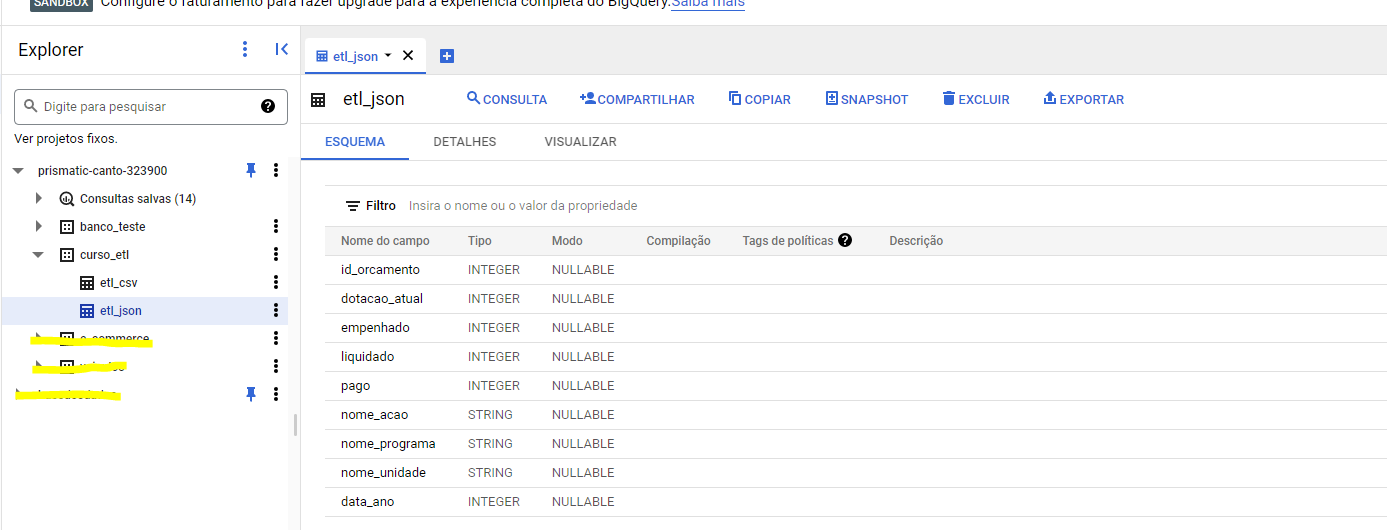

In [ ]:
from PIL import Image
Image.open('tb final json.png')

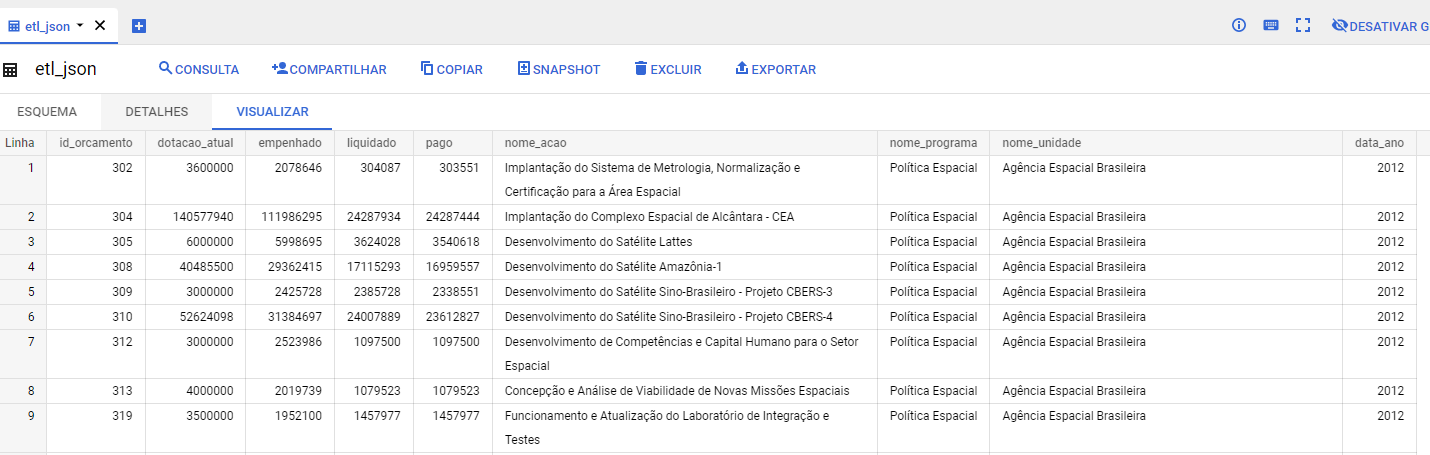

In [ ]:
Image.open('tb final json visualizacao.png')